# 4장. 모델 훈련

https://nbviewer.jupyter.org/github/rickiepark/handson-ml/tree/master/

이 코드의 내용은 Hands-On Machine Learning with Scikit-Learn & TensorFlow을 참고했음을 밝힙니다.

## 모델을 훈련시키는 두 가지 방법(p155)

* 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터(즉, 훈련 세트에 대해 비용 함수를 최소화하는 모델 파라미터)를 해석적으로 구합니다.
* 경사 하강법(GD)이라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화시킵니다. 결국에는 앞의 방법과 동일한 파라미터로 수렴합니다. 경사 하강법의 변종으로 2부에서 신경망을 공부할 때 계속 사용하게 될 배치(Batch) 경사 하강법, 미니배치(Mini-batch) 경사 하강법, 확률적(Stochastic) 경사 하강법(SGD)도 살펴보겠습니다.

## 선형 회귀(p156)

![image.png](https://i.imgur.com/Nu9c7r3.png)

![image.png](https://i.imgur.com/ZNZ9KtM.png)

## 정규방정식(p158)

![image.png](https://i.imgur.com/nfaY9qN.png)

![image.png](https://i.imgur.com/gH9U7Nt.png)

![image.png](https://i.imgur.com/09KgfyC.png)

4번째 줄에서 5번째 줄로 넘어갈 때 스칼라함수를 벡터로 미분하는 경우이며 첫째 항은 위의 5번 rule을 사용한 것이다. 5번 rule에서 A가 X^(T)X인 경우이고, symmetric이므로 2w^(T)(X^(T)X)로 계산이 된다. 마찬가지로 두번째 항은 1번 rule을 사용한 것이다. 그 아래로는 모두 transpose와 inverse 성질들을 이용하면 쉽게 따라갈 수 있을 것이라 생각한다.  

(혹은, 위 과정 필요없이 곧바로 3번째 줄에서 11번 rule을 적용하면 쉽게 w를 구할 수 있다.)

출처 https://m.blog.naver.com/enewltlr/220918689039

In [1]:
# rand: 0부터 1사이의 균일 분포
# randn: 가우시안 표준 정규 분포
# randint: 균일 분포의 정수 난수

import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.rand(100,1)

In [11]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# matplotlib 한글 설정
import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

font_name=font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

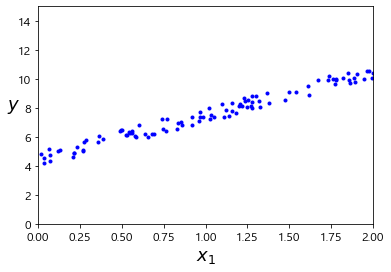

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
X_b = np.c_[np.ones((100,1)), X] # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.52806427],
       [2.97220952]])

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.52806427],
       [10.47248331]])

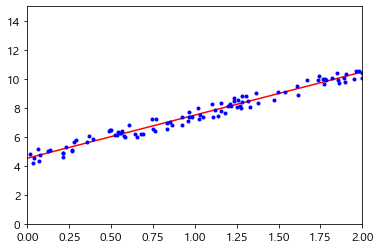

In [7]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_ # intercept_(편향), coef_(가중치)

(array([4.52806427]), array([[2.97220952]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.52806427],
       [10.47248331]])

## 계산 복잡도(p160)

* 정규방정식은 (n+1)\*(n+1) 크기가 되는 Xt * X의 역행렬을 계산합니다(n은 특성 수). 역행렬은 계산하는 계산 복잡도(computational complexity)는 일반적으로 O(n\*\*2.4)에서 O(n\*\*3) 사이입니다(구현 방법에 따라 차이가 있습니다). 다시 말해 특성 수가 두 배로 늘어나면 계산 시간이 대략 2\*\*2.4 = 5.3에서 2\*\*3=8배로 증가합니다.
* 특성 수가 매우 많아지면(예를 들면 100,000개) 정규방정식이 매우 느려집니다.
* 다행인 것은 이 공식의 복잡도가 훈련 세트의 샘플 수에는 선형적으로 증가합니다(즉, O(m)). 그러므로 메모리 공간이 허락된다면 큰 훈련 세트도 효율적으로 처리할 수 있습니다.
* 또한 (정규방정식이나 다른 알고리즘으로) 학습된 선형 회귀 모델은 예측이 매우 빠릅니다. 예측 계산 복잡도는 샘플 수와 특성 수에 선형적입니다. 다시 말해 예측하려는 샘플이 두 배로 늘어나면(또는 특성이 두 배로 늘어나면) 걸리는 시간도 거의 두 배 증가합니다.

## 경사 하강법(p161)

![image.png](https://i.imgur.com/hJh8yql.png)

* theta를 임의의 값으로 시작해서(무작위 초기화, random initialization) 한번에 조금씩 비용 함수(예를 들면 MSE)가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킵니다.
* 경사 하강법에서 중요한 파라미터는 스텝의 크기로, 학습률(learning rate) 하이퍼파라미터로 결정됩니다.

![image.png](https://i.imgur.com/NKKRlpm.png)

학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸립니다.  
학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 올라가게 될지도 모릅니다. 이는 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못하게 합니다.  

![image.png](https://i.imgur.com/Uv0GElw.png)

선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록함수(convex function)입니다. 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 뜻입니다. 또한 연속된 함수이고 기울기가 갑자기 변하지 않습니다. 이 두 사실로부터 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장합니다(학습률이 너무 높지 않고 충분한 시간이 주어지면).  
두 점을 이은 선분이 두 점 사이에서 항상 곡선 위에 위치할 경우를 볼록 함수, 아래에 위치할 경우 오목 함수라고 합니다.

![image.png](https://i.imgur.com/imqLJ5M.png)

비용 함수는 그릇 모양을 하고 있지만 특성들의 스케일이 매우 다르면 길쭉한 모양일 수 있습니다. 경사 하강법을 사용할 때에는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 합니다(예를 들어 사이킷런의 StandardScaler를 사용하여). 그렇지 않으면 수렴하는 데 훨씬 오래 걸립니다.

## 배치 경사 하강법(p165)

![image.png](https://i.imgur.com/cqdedKh.png)

경사 하강법을 구현하려면 각 모델 파라미터 theta j 에 대해 비용 함수의 그래디언트를 계산해야 합니다. 다시 말해 theta j 가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야 합니다. 이를 편도 함수(partial derivative)라고 합니다.

![image.png](https://i.imgur.com/tsiMPo7.png)

편도함수를 각각 계산하는 대신 위의 식을 사용하여 한꺼번에 계산할 수 있습니다.  
이 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산합니다. 그래서 이 알고리즘을 배치 경사 하강법(Batch Gradient Descent)이라고 합니다. 즉, 매 스텝에서 훈련 데이터 전체를 사용합니다. 이런 이유로 매우 큰 훈련 세트에서는 아주 느립니다. 그러나 경사 하강법은 특성 수에 민감하지 않습니다. 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식보다 경사 하강법을 사용하는 편이 훨씬 빠릅니다.

In [40]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [41]:
theta

array([[ 3.29127521],
       [-0.03775369]])

* 적절한 학습률을 찾으려면 그리드 탐색을 사용합니다. 하지만 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야 합니다.
* 반복 횟수를 지정하는 간단한 해결책은 반복 횟수를 아주 크게 지정하고 그래디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값(허용오차, tolerance)보다 작아지면 경사 하강법이 (거의) 최솟값에 도달한 것이므로 알고리즘을 중지하는 것입니다.

## 확률적 경사 하강법(p168)

* 배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그래디언트를 계산한다는 사실입니다. 훈련 세트가 커지면 매우 느려지게 됩니다.
* 이와는 정반대로 확률적 경사 하강법은 매 스텝에서 딱 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산합니다. 매 반복에서 매우 적은 데이터만 처리하기 떄문에 알고리즘이 확실히 훨씬 더 빠릅니다. 또한 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있습니다(SGD는 외부 메모리 학습 알고리즘으로 구현할 수 있습니다).
* 반면에 확률적(즉, 무작위)이기 때문에 이 알고리즘은 배치 경사 하강법보다 훨씬 불안정합니다. 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치면서 평균적으로 감소합니다. 시간이 지나면 최솟값에 매우 근접하겠지만 요동이 지속되면서 최솟값에 안착하지 못할 것입니다. 알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만 최적치는 아닙니다.
* 비용 함수가 매우 불규칙할 경우(convex function이 아닐 경우) 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와주므로 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높습니다.
* 무작위성은 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서는 좋지 않습니다. 이 딜레마를 해결하는 한 가지 방법은 학습률을 점진적으로 감소시키는 것입니다. 시작할 때는 학습률을 크게 하고(수렴을 빠르게 하고 지역 최솟값에 빠지지 않게 합니다), 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 합니다. 이 과정은 금속공학 분야에서 가열한 금속을 천천히 냉각시키는 어닐링(annealing, 담금질) 과정과 유사합니다. 매 반복에서 학습률을 결정하는 함수를 학습 스케줄(learning schedule, 학습률 스케줄)이라고 부릅니다. 학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 최솟값까지 가는 중간에 멈춰버릴 수도 있습니다. 학습률이 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지해서 지역 최솟값에 머무를 수 있습니다.

In [54]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients

In [58]:
# 일반적으로 한 반복에서 m(훈련 세트에 있는 샘플 수)번 되풀이 되고, 이때 각 반복을 에포크(epoch)라고 합니다.
# 배치 경사 하강법 코드가 전체 훈련 세트에 대해 1,000번 반복하는 동안 이 코드는 훈련 세트에서 50번만 반복하고도 매우 좋은 값에 도달했습니다.

theta

array([[ 3.30662391],
       [-0.13234432]])

샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수도 있습니다. 알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞는 식의 방법을 사용할 수 있습니다(사이킷런의 SGDClassifier와 SGDRegressor가 사용하는 방법). 그러나 이렇게 하면 보통 더 늦게 수렴됩니다.

사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 SGDRegressor 클래스를 사용합니다.

In [59]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1) # penalty : 규제, eta0 : 학습률
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [60]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.22526554]), array([1.28919958]))

## 미니배치 경사 하강법(p171)

* 각 스텝에서 전체 훈련 세트(배치 경사 하강법)나 하나의 샘플(확률적 경사 하강법)을 기반으로 그래디언트를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산합니다.
* 확률적 경사 하강법에 비해 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상입니다.
* 특히 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직입니다. 결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것입니다. 하지만 한편으로는 지역 최솟값에서 빠져나오기는 더 힘들지도 모릅니다(앞서 본 선형 회귀와 같지 않고 지역 최솟값이 문제가 되는 경우).

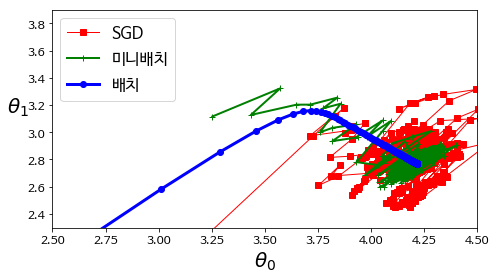

* 모두 최솟값 근처에 도달했지만 배치 경사 하강법의 경로가 실제로 최솟값에서 멈춘 반면 확률적 경사 하강법과 미니배치 경사 하강법은 근처에서 맴돌고 있습니다.
* 그렇지만 배치 경사 하강법에는 매 스텝에서 많은 시간이 소요되고, 확률적 경사 하강법과 미니배치 경사 하강법도 적절한 학습 스케줄을 사용하면 최솟값에 도달한다는 것을 잊지 말아야 합니다.

![image.png](https://i.imgur.com/Jzn44em.png)

## 다항 회귀(p173)

* 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 방법입니다.
* 사이킷런의 PolynomialFeatures(매개변수 degree의 기본값은 2이고 include_bias의 기본값은 True입니다. include_bias=True면 편향을 위한 특성(x0)인 1이 추가됩니다.)

In [88]:
np.random.seed(42)
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5 * (X**2) + X + 2 + np.random.randn(m,1)

In [68]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) # 훈련 세트에 있는 각 특성을 제곱(2차 다항)하여 새로운 특성으로 추가합니다.
X[0]

array([-0.75275929])

In [69]:
X_poly[0] # 원래 특성 X와 이 특성의 제곱을 포함합니다.

array([-0.75275929,  0.56664654])

In [70]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

C:\Users\ie-19\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ie-19\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


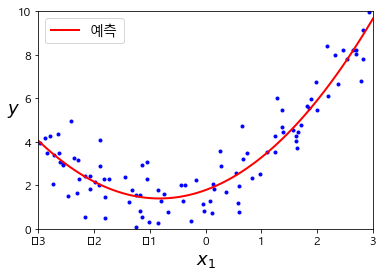

In [71]:
# 시각화

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="예측")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

* 특성이 여러 개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있습니다(일반적인 선형 회귀 모델에서는 하지 못합니다). PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문입니다. 예를 들어 두 개의 특성 a,b가 있을 때 degree=3으로 PolynomialFeatures를 적용하면 a\*\*2, a\*\*3, b\*\*2, b\*\*3뿐만 아니라, ab, a\*\*2b, ab\*\*2도 특성으로 추가합니다(PolynomialFeatures에서 interaction_only=False로 지정하면 거듭제곱이 포함된 항은 모두 제외됩니다. 즉 a,b,ab만 남습니다. PolynomialFeatures의 객체에서 get_feature_names() 메서드를 호출하면 만들어진 특성의 차수를 쉽게 확인할 수 있습니다.).
* PolynomialFeatures(degree=d)는 특성이 n개인 배열을 특성이 (n+d)!/d!n!개인 배열로 변환합니다.

## 학습곡선(p175)

* 얼마나 복잡한 모델을 사용할지 어떻게 결정할 수 있을까요? 어떻게 모델이 데이터에 과대적합 또는 과소적합되었는지 알 수 있을까요?
* 2장에서 모델의 일반화 성능을 추정하기 위해 교차 검증을 사용했습니다. 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 모델이 과대적합된 것입니다. 만약 양쪽에 모두 좋지 않으면 과소적합입니다. 이때 모델이 너무 단순하거나 너무 복잡하다고 말합니다.
* 또 다른 방법은 학습 곡선을 살펴보는 것입니다. 이 그래프는 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냅니다. 이 그래프를 생성하기 위해서는 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 됩니다.

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='훈련 세트')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='검증 세트')
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("훈련 세트 크기", fontsize=14)
    plt.ylabel("RMSE", fontsize=14) 

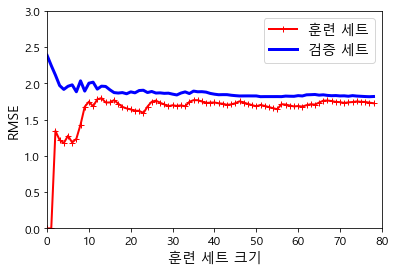

In [101]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

* 먼저 훈련 데이터의 성능을 보겠습니다. 그래프가 0에서 시작하므로 훈련 세트에 하나 혹은 두 개의 샘플이 있을 땐 모델이 완벽하게 작동합니다. 하지만 훈련 세트에 샘플이 추가됨에 따라 노이즈도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것이 불가능해집니다. 그래서 곡선이 어느 정도 평편해질 때까지 오차가 계속 상승합니다. 이 위치에서는 훈련 세트에 샘플이 추가되어도 평균 오차가 크게 나아지거나 나빠지지 않습니다.
* 그럼 이제 검증 데이터에 대한 모델의 성능을 보겠습니다. 모델이 적은 수의 훈련 샘플로 훈련될 때에는 제대로 일반화될 수 없어서 검증 오차가 초기에 매우 큽니다. 모델에 훈련 샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소합니다. 하지만 선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해져서 훈련 세트의 그래프와 가까워집니다.
* 이 학습 곡선이 과소적합 모델의 전형적인 모습입니다. 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있습니다.
* 모델이 훈련 데이터에 과소적합되어 있다면 훈련 샘플을 더 추가해도 효과가 없습니다. 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 합니다.

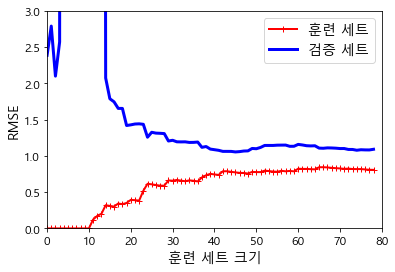

In [103]:
np.random.seed(42)
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

이 학습 곡선은 이전과 비슷해 보이지만 두 가지 매우 중요한 차이점이 있습니다.
* 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮습니다.
* 두 곡선 사이에 공간이 있습니다. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 이는 과대적합 모델의 특징입니다. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워집니다.<br>

과대적합 모델을 개선하는 한 가지 방법은 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가하는 것입니다.

## 편향/분산 트레이드오프(p179)

통계학과 머신러닝에서 나온 중요한 이론 하나는 모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현할 수 있다는 사실입니다. 모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어듭니다. 반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아집니다. 그래서 트레이드오프라고 부릅니다.
* 편향<br>
일반화 오차 중에서 편향은 잘못된 가정으로 인한 것입니다. 예를 들어 데이터가 실제로는 2차인데 선형으로 가정하는 경우입니다. 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉽습니다.
* 분산<br>
분산(variance)은 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타납니다. 자유도가 높은 모델(예를 들면 고차 다항 회귀 모델)이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있습니다.
* 줄일 수 없는 오차<br>
줄일 수 없는 오차(irreducible error)는 데이터 자체에 있는 노이즈 때문에 발생합니다. 이 오차를 줄일 수 있는 유일한 방법은 데이터에서 노이즈를 제거하는 것입니다(예를 들어 고장 난 센서 같은 데이터 소스를 고치거나 이상치를 감지해 제거합니다).

## 규제가 있는 선형 모델(p179)

* 다항 회귀 모델 : 다항식의 차수를 감소시킵니다(자유도를 줄이면 데이터에 과대적합되기 더 어려워집니다).
* 선형 회귀 모델 : 모델의 가중치를 제한합니다.

## 릿지 회귀(p180)

릿지 회귀의 비용 함수

![image.png](https://i.imgur.com/4iecNBZ.png)

* 릿지 회귀(또는 티호노프 규제)는 규제가 추가된 선형 회귀 버전입니다. 규제항이 비용 함수에 추가됩니다. 이는 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력합니다. 규제항은 훈련하는 동안에만 비용 함수에 추가됩니다. 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능지표로 평가합니다.(규제는 비용 함수에 추가되는 것으로, 테스트 세트에서 성능을 평가하거나 실제 샘플을 예측할 떄는 포함되지 않습니다.)
* 일반적으로 훈련하는 동안 사용되는 비용 함수와 테스트에서 사용되는 성능 지표는 다릅니다. 규제를 떠나서 이들이 다른 이유는 훈련에 사용되는 비용 함수는 최적화를 위해 미분 가능해야 하기 때문입니다. 반면 테스트에 사용되는 성능 지표는 최종 목표에 가능한 한 가까워야 합니다. 로그 손실 같은 비용 함수를 사용하여 훈련시킨 분류기를 정밀도/재현율을 사용하여 평가하는 것이 좋은 예입니다.
* 하이퍼파라미터 a는 모델을 얼마나 많이 규제할지 조절합니다. a=0이면 릿지 회귀는 선형 회귀와 같아집니다. a가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됩니다.
* 릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요합니다(예를 들면 StandarScaler를 사용해서). 규제가 있는 모델은 대부분 마찬가지입니다.

![image.png](https://i.imgur.com/Y27pjks.png)

위의 그림은 선형 데이터에 몇 가지 다른 a를 사용해 릿지 모델을 훈련시킨 결과입니다. 왼쪽 그래프는 평범한 릿지 모델을 사용해 선형적인 예측을 만들었습니다. 오른쪽 그래프는 PolynomialFeatures(degree=10)을 사용해 먼저 데이터를 확장하고 StandardScaler를 사용해 스케일을 조정한 후 릿지 모델을 적용했습니다. 결국 이는 릿지 규제를 사용한 다항 회귀가 됩니다. a를 증가시킬수록 직선에 가까워지는 것을 볼 수 있습니다. 값을 줄이면 모델의 분산은 줄지만 편향은 커지게 됩니다.

선형 회귀와 마찬가지로 릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고 경사 하강법을 사용할 수도 있습니다. 장단점은 이전과 같습니다.

![image.png](https://i.imgur.com/1gxRyOP.png)

안드레 루이 숄레스키가 발견한 행렬 분해를 사용하여 위의 식을 변형한 방정식을 사용합니다.  

![image.png](https://i.imgur.com/mVgUeIW.png)

In [105]:
# 정규방정식을 사용한 릿지 회귀를 적용하는 예
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.82497007]])

In [107]:
# 확률적 경사 하강법을 사용했을 때
sgd_reg = SGDRegressor(max_iter=5, penalty='l2') # penalty : 사용할 규제를 지정(l2 : 릿지 회귀)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\ie-19\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([3.81725914])

## 라쏘 회귀(p183)

![image.png](https://i.imgur.com/0yQGnvf.png)

라쏘(Lasso) 회귀는 릿지 회귀처럼 비용 함수에 규제항을 더하지만 l2 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 l1 노름을 사용합니다.

![image.png](https://i.imgur.com/veSQ9Z4.png)

라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 완전히 제거하려고 한다는 점입니다(즉, 가중치가 0이 됩니다). 다시 말해 라쏘 회귀는 자동으로 특성 선택을 하고 희소 모델(sparse model)을 만듭니다(즉, 0이 아닌 특성의 가중치가 적습니다).

![image.png](https://i.imgur.com/tt7tFzZ.png)

라쏘 비용 함수에서 배치 경사 하강법의 경로가 종착지로 가는 통로에서 지그재그로 튀는 경향을 보입니다. 이는 theta2 = 0에서 갑자기 기울기가 바뀌기 때문입니다. 전역 최솟값에 수렴하기 위해서는 학습률을 점진적으로 줄여나가야 합니다.

라쏘의 비용 함수는 theta i = 0(i=0,1,2,...,n일 때)에서 미분 가능하지 않습니다. 하지만 theta i =0 일때 서브그래디언트 벡터(subgradient vector) g를 사용하면 경사 하강법을 적용하는 데 문제가 없습니다. 아래는 경사 하강법을 위해 라쏘 비용 함수에 사용할 수 있는 서브그래디언트 벡터 공식입니다.

![image.png](https://i.imgur.com/2uyakV4.png)

In [108]:
# Lasso 클래스를 사용했을 때
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.77621741])

In [109]:
# 확률적 경사 하강법을 사용했을 때
sgd_reg = SGDRegressor(max_iter=5, penalty='l1') # penalty : 사용할 규제를 지정(l1 : 라쏘 회귀)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\ie-19\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([3.79278228])

## 엘라스틱넷(p185)

![image.png](https://i.imgur.com/7ihSSw6.png)

엘라스틱넷(Elastic Net)은 릿지 회귀와 라쏘 회귀를 절충한 모델입니다. 규제항은 릿지와 라쏘의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절합니다. r=0이면 엘라스틱넷은 릿지 회귀와 같고, r=1이면 라쏘 회귀와 같습니다.

In [110]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.78114505])

그럼 보통의 선형 회귀(즉, 규제가 없는 모델), 릿지, 라쏘, 엘라스틱넷을 언제 사용해야 할까요? 적어도 규제가 약간 있는 것이 대부분의 경우에 좋으므로 일반적으로 평범한 선형 회귀는 피해야 합니다. 릿지가 기본이 되지만 실제로 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 더 낫습니다. 이 모델들은 이전에 이야기한 것처럼 불필요한 특성의 가중치를 0으로 만들어줍니다. 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 라쏘보다는 엘라스틱넷을 선호합니다. 라쏘는 특성 수가 샘플 수(n)보다 많으면 최대 n개의 특성을 선택합니다. 또한 여러 특성이 강하게 연관되어 있으면 이들 중 임의의 특성 하나를 선택합니다.

## 조기 종료(p186)

경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 아주 색다른 방법은 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것입니다. 이를 조기 종료(early stopping)라고 합니다.

![image.png](https://i.imgur.com/JWzzf7n.png)

위 그림은 배치 경사 하강법으로 훈련시킨 복잡한 모델(고차원 다항 회귀 모델)을 보여줍니다. 에포크가 진행됨에 따라 알고리즘이 점차 학습되어 훈련 세트에 대한 예측 에러(RMSE)와 검증 세트에 대한 예측 에러가 줄어듭니다. 그러나 잠시 후 감소하던 검증 에러가 멈추었다가 다시 상승합니다. 모델이 훈련 데이터에 과대적합되기 시작하는 것을 의미합니다. 조기 종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것입니다. 이 규제 테크닉은 매우 효과적이고 간단해서 제프리 힌튼이 '훌륭한 공짜 점심(beautiful free lunch)'이라고 불렀습니다.
* 확률적 경사 하강법이나 미니배치 경사 하강법에서는 곡선이 그리 매끄럽지 않아 최솟값에 도달했는지 확인하기 어려울 수 있습니다. 한 가지 해결책은 검증 에러가 일정 시간 동안 최솟값보다 클 때(모델이 더 나아지지 않는다고 확신이 들 때) 학습을 멈추고 검증 에러가 최소였을 때의 모델 파라미터로 되돌리는 것입니다.

In [112]:
# 조기 종료를 위한 기본적인 구현 코드

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# 데이터 준비
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                      learning_rate='constant', eta0=0.0005) # warm_start=True : fit() 메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어갑니다.

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # 훈련을 이어서 진행합니다.
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train' is not defined

## 로지스틱 회귀(p188)

* 로지스틱 회귀(Logistic Regression, 또는 로짓 회귀(Logit Regression)는 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용됩니다(예를 들면 이 이메일이 스팸일 확률은 얼마인가?). 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측합니다(즉 레이블이 '1'인 양성 클래스). 아니면 클래스에 속하지 않는다고 예측합니다(즉, 레이블이 '0'인 음성 클래스). 이를 이진 분류기라고 합니다.
* 선형 회귀 모델과 같이 로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산합니다(그리고 편향을 더합니다). 대신 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 로지스틱(logistic)을 출력합니다.  
![image.png](https://i.imgur.com/LrC7EJO.png)<br>  
* 로지스틱(또는 로짓(logit)이라고 부른다)은 0과 1 사이의 값을 출력하는 시그모이드 함수(sigmoid function)입니다(즉, S자 형태입니다).

C:\Users\ie-19\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ie-19\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


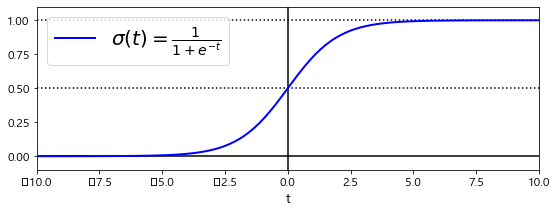

In [113]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

* t<0이면 sigma(t)<0.5이고, t>=0이면 sigma(t) >=0.5이므로 로지스틱 회귀 모델은 h(x)가 양수일 때 1(양성 클래스)이라고 예측하고, 음수일 때 0(음성 클래스)이라고 예측합니다.
* 사이킷런의 LogisticRegression은 클래스 레이블을 반환하는 predict() 메서드와 클래스에 속할 확률을 반환하는 predict_proba() 메서드를 가지고 있습니다. predict() 메서드는 h(x) 값이 0보다 클 떄를 양성 클래스로 판단하여 결과를 반환하고 predict_proba() 메서드는 시그모이드 함수를 적용하여 계산한 확률을 반환합니다.

로지스틱 회귀의 비용 함수(로그 손실)

![image.png](https://i.imgur.com/nFACMjd.png)

안타깝게도 이 비용 함수의 최솟값을 계산하는 알려진 해가 없습니다(정규방정식 같은 것이 없습니다). 하지만 이 비용 함수는 볼록 함수이므로 경사 하강법(또는 어떤 다른 최적화 알고리즘)이 전역 최솟값을 찾는 것을 보장합니다(학습률이 너무 크지 않고 충분히 기다릴 시간이 있다면). 이 비용 함수의 j번째 모델 파라미터 theta j에 대해 편미분을 하면 아래와 같습니다.

![image.png](https://i.imgur.com/Kf1LNID.png)

## 결정 경계(p191)

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [4]:
X = iris['data'][:,3:] # 꽃잎의 너비
y = (iris['target']==2).astype(np.int) # Iris-Virginica면 1, 그렇지 않으면 0

In [5]:
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

C:\Users\ie-19\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

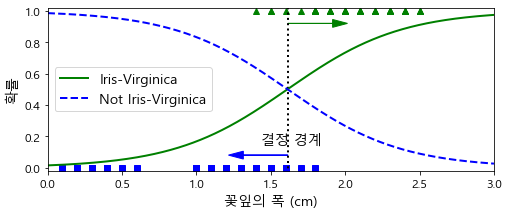

In [12]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률을 계산

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "결정 경계", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("꽃잎의 폭 (cm)", fontsize=14)
plt.ylabel("확률", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

Iris-Verginica(삼각형으로 표시)의 꽃잎 너비는 1.4\~2.5cm에 분포합니다. 반면 다른 붓꽃(사각형으로 표시)은 일반적으로 꽃잎 너비가 더 작아 0.1\~1.8cm에 분포합니다. 그래서 약간 중첩되는 부분이 있습니다. 꽃잎 너비가 2cm 이상인 꽃은 분류기가 Iris-Verginica라고 강하게 확신합니다(이 클래스에 대해 높은 확률을 출력합니다). 반면 1cm 아래면 Iris-Verginica가 아니라고 강하게 확신합니다('Iris-Verginica 아님' 클래스에 대한 확률이 높습니다). 이 두 극단 사이에서는 분류가 확실하지 않습니다. 하지만 어쨌든 클래스를 예측하려고 하면(predict_proba() 메서드 대신 predict() 메서드를 사용해서) 가장 가능성 높은 클래스를 반환할 것입니다. 그렇기 때문에 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 결졍 경계(decision boundary)가 만들어집니다. 꽃잎 너비가 1.6cm보다 크면 분류기는 Iris-Verginica로 분류하고, 그보다 작으면 아니라고 예측할 것입니다(아주 확실하지 않더라도).

In [13]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

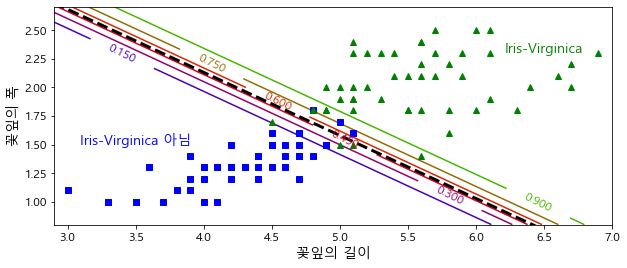

In [14]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver='liblinear', C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Iris-Virginica 아님", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽃잎의 폭", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

위 그림은 같은 데이터셋을 이번에는 꽃잎 너비와 꽃잎 길이 두 개의 특성으로 보여줍니다. 훈련이 끝나면 로지스틱 회귀 분류기가 이 두 특성을 기반으로 하여 새로운 꽃이 Iris-Verginica인지 확률을 추정할 수 있습니다. 점선은 모델이 50% 확률을 추정하는 지점으로, 이 모델의 결정 경계입니다. 이 경계는 선형임에 주목하세요. 15%(왼쪽 아래)부터 90%(오른쪽 위)까지 수평한 직선들은 모델이 특정 확률을 출력하는 포인트를 나타냅니다. 모델은 맨 오른쪽 위의 직선을 넘어서 있는 꽃들을 90% 이상의 확률로 Iris-Virginica라고 판단할 것입니다.

## 소프트맥스 회귀(p194)

로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있습니다. 이를 소프트맥스 회귀(Softmax Regression) 또는 다항 로지스틱 회귀(Multinomial Logistic Regression)라고 합니다. 
개념은 매우 간단합니다. 샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 Sk(x)를 계산하고, 그 점수에 소프트맥스 함수(softmax function, 또는 정규화된 지수 함수(normalized exponential))를 적용하여 각 클래스의 확률을 추정합니다.  
로지스틱 회귀 분류기와 마찬가지로 소프트맥스 회귀 분류기는 아래 3번째 식처럼 추정 확률이 가장 높은 클래스(그냥 가장 높은 점수를 가진 클래스)를 선택합니다.  
![image.png](https://i.imgur.com/nOWjwfe.png)  
* 소프트맥스 회귀 분류기는 한 번에 하나의 클래스만 예측합니다(즉, 다중 클래스(multiclass)지 다중 출력(multioutput)은 아닙니다). 그래서 종류가 다른 붓꽃 같이 상호 배타적인 클래스에서만 사용해야 합니다. 하나의 사진에서 여러 사람의 얼굴을 인식하는 데는 사용할 수 없습니다.

모델이 타깃 클래스에 대해서는 높은 확률을(그리고 다른 클래스에 대해서는 낮은 확률을) 추정하도록 만드는 것이 목적입니다. 아래 식의 크로스 엔트로피 비용 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합합니다. 크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용됩니다.

![image.png](https://i.imgur.com/pg5gIfK.png)

이 비용 함수의 theta(k)에 대한 그래디언트 벡터는 아래 식과 같습니다.  
![image.png](https://i.imgur.com/rcyyd3t.png)  
이제 각 클래스에 대한 그래디언트 벡터를 계산할 수 있으므로 비용 함수를 최소화하기 위한 파라미터 행렬을 찾기 위해 경사 하강법(또는 다른 최적화 알고리즘)을 사용할 수 있습니다.

소프트맥스 회귀를 사용해 붓꽃을 세 개의 클래스로 분류해보겠습니다. 사이킷런의 Logistic Regression은 클래스가 둘 이상일 때 기본적으로 일대다(OvA) 전략을 사용합니다. 하지만 multi_class 매개변수를 'multinomial'로 바꾸면 소프트맥스 회귀를 사용할 수 있습니다. 소프트맥스 회귀를 사용하려면 solver 매개변수에 'lbfgs'와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 합니다. 또한 기본적으로 하이퍼파라미터 C를 사용하여 조절할 수 있는 l2 규제가 적용됩니다.

In [16]:
X = iris['data'][:,(2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris['target']
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
softmax_reg.predict([[5,2]]) # 꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃의 품종은?

array([2])

In [18]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

![image.png](https://i.imgur.com/edldqcE.png)

## 연습문제(p198)

#### 1. 수백만 개의 특성을 가진 훈련 세트에서는 어떤 선형 회귀 알고리즘을 사용할 수 있을까요?  
수백만 개의 특성이 있는 훈련 세트를 가지고 있다면 확률적 경사 하강법(SGD)이나 미니배치 경사 하강법을 사용할 수 있습니다. 훈련 세트가 메모리 크기에 맞으면 배치 경사 하강법도 가능합니다. 하지만 정규방정식은 계산 복잡도가 특성 개수에 따라 매우 빠르게 증가하기 때문에 사용할 수 없습니다.
<br><br>

#### 2. 훈련 세트에 있는 특성들이 각기 아주 다른 스케일을 가지고 있습니다. 이런 데이터에 잘 작동하지 않는 알고리즘과 그 이유는 무엇일까요? 이 문제를 어떻게 해결할 수 있을까요?
훈련 세트에 있는 특성의 스케일이 매우 다르면 비용 함수는 길쭉한 타원 모양의 그릇 형태가 됩니다. 그래서 경사 하강법(GD) 알고리즘이 수렴하는 데 오랜 시간이 걸릴 것입니다. 이를 해결하기 위해서는 모델을 훈련하기 전에 데이터의 스케일을 조절해야 합니다. 정규방정식은 스케일 조정 없이도 잘 작동합니다. 또한 규제가 있는 모델은 특성의 스케일이 다르면 지역 최적점에 수렴할 가능성이 있습니다. 실제로 규제는 가중치가 커지지 못하게 제약을 가하므로 특성값이 작으면 큰 값을 가진 특성에 비해 무시되는 경향이 있습니다.
<br><br>

#### 3. 경사 하강법으로 로지스틱 회귀 모델을 훈련시킬 때 지역 최솟값에 갇힐 가능성이 있을까요? 
로지스틱 회귀 모델의 비용 함수는 볼록 함수이므로 경사 하강법이 훈련될 때 지역 최솟값에 갇힐 가능성이 없습니다.
<br><br>

#### 4. 충분히 오랫동안 실행하면 모든 경사 하강법 알고리즘이 같은 모델을 만들어낼까요?  
최적화할 함수가 (선형 회귀나 로지스틱 회귀처럼) 볼록 함수이고 학습률이 너무 크지 않다고 가정하면 모든 경사 하강법 알고리즘이 전역 최적값에 도달하고 결국 비슷한 모델을 만들 것입니다. 하지만 학습률을 점진적으로 감소시키지 않으면 SGD와 미니배치 GD는 진정한 최적점에 수렴하지 못할 것입니다. 대신 전역 최적점 주변을 이리저리 맴돌게 됩니다. 이 말은 매우 오랫동안 훈련을 해도 경사 하강법 알고리즘들은 조금씩 다른 모델을 만들게 된다는 뜻입니다.
<br><br>

#### 5. 배치 경사 하강법을 사용하고 에포크마다 검증 오차를 그래프로 나타내봤습니다. 검증 오차가 일정하게 상승되고 있다면 어떤 일이 일어나고 있는 걸까요? 이 문제를 어떻게 해결할 수 있나요? 
에포크마다 검증 에러가 지속적으로 상승한다면 한 가지 가능성은 학습률이 너무 높고 알고리즘이 발산하는 것일지 모릅니다. 훈련 에러도 올라간다면 이 문제가 확실하고 학습률을 낮추어야 합니다. 그러나 훈련 에러가 올라가지 않는다면 모델이 훈련 세트에 과대적합되어 있는 것이므로 훈련을 멈추어야 합니다.
<br><br>

#### 6. 검증 오차가 상승하면 미니배치 경사 하강법을 즉시 중단하는 것이 좋은 방법인가요?  
무작위성 때문에 확률적 경사 하강법이나 미니배치 경사 하강법 모두 매 훈련 반복마다 학습의 진전을 보장하지 못합니다. 검증 에러가 상승될 때 훈련을 즉시 멈춘다면 최적점에 도달하기 전에 너무 일찍 멈추게 될지 모릅니다. 더 나은 방법은 정기적으로 모델을 저장하고 오랫동안 진전이 없을 때(즉, 최상의 점수를 넘어서지 못하면), 저장된 것 중 가장 좋은 모델로 복원하는 것입니다.
<br><br>

#### 7. (우리가 언급한 것 중에서) 어떤 경사 하강법 알고리즘이 가장 빠르게 최적 솔루션의 주변에 도달할까요? 실제로 수렴하는 것은 어떤 것인가요? 다른 방법들도 수렴하게 만들 수 있나요?  
확률적 경사 하강법은 한 번에 하나의 훈련 샘플만 사용하기 때문에 훈련 반복이 가장 빠릅니다. 그래서 가장 먼저 전역 최적점 근처에 도달합니다(그다음이 작은 미니배치 크기를 가진 미니배치 GD입니다). 그러나 훈련 시간이 충분하면 배치 경사 하강법만 실제로 수렴할 것입니다. 앞서 언급한 대로 학습률을 점진적으로 감소시키지 않으면 SGD와 미니배치 GD는 최적점 주변을 맴돌 것입니다.
<br><br>

#### 8. 다항 회귀를 사용했을 때 학습 곡선을 보니 훈련 오차와 검증 오차 사이에 간격이 큽니다. 무슨 일이 생긴 걸까요? 이 문제를 해결하는 세 가지 방법은 무엇인가요?  
검증 오차가 훈련 오차보다 훨씬 더 높으면 모델이 훈련 세트에 과대적합되었기 때문일 가능성이 높습니다. 이를 해결하는 첫 번째 방법은 다항 차수를 낮추는 것입니다. 자유도를 줄이면 과대적합이 훨씬 줄어들 것입니다. 두 번째 방법은 모델을 규제하는 것입니다. 예를 들어 비용 함수에 l2 페널티(릿지)나 l1 페널티(라쏘)를 추가합니다. 이 방법도 모델의 자유도를 감소시킵니다. 세 번째 방법은 훈련 세트의 크기를 증가시키는 것입니다.
<br><br>

#### 9. 릿지 회귀를 사용했을 때 훈련 오차와 검증 오차가 거의 비슷하고 둘 다 높았습니다. 이 모델에는 높은 편향이 문제인가요, 아니면 높은 분산이 문제인가요? 규제 하이퍼파라미터 a를 증가시켜야 할까요, 아니면 줄여야 할까요?  
훈련 에러와 검증 에러가 거의 비슷하고 매우 높다면 모델이 훈련 세트에 과소적합되었을 가능성이 높습니다. 즉, 높은 편향을 가진 모델입니다. 따라서 규제 하이퍼파라미터 a를 감소시켜야 합니다.
<br><br>

#### 10. 다음과 같이 사용해야 하는 이유는?  
(1) 평범한 선형 회귀(즉, 아무런 규제가 없는 모델) 대신 릿지 회귀  
규제가 있는 모델이 일반적으로 규제가 없는 모델보다 성능이 좋습니다. 그래서 평범한 선형 회귀보다 릿지 회귀가 선호됩니다.  
(2) 릿지 회귀 대신 라쏘 회귀  
라쏘 회귀는 l1 패널티 사용하여 가중치를 완전히 0으로 만드는 경향이 있습니다. 이는 가장 중요한 가중치를 제외하고는 모두 0이 되는 희소한 모델을 만듭니다. 또한 자동으로 특성 선택의 효과를 가지므로 단지 몇 개의 특성만 실제 유용할 것이라고 의심될 때 사용하면 좋습니다. 만약 확신이 없다면 릿지 회귀를 사용해야 합니다.  
(3) 라쏘 회귀 대신 엘라스틱넷  
라쏘가 어떤 경우(몇 개의 특성이 강하게 연관되어 있거나 훈련 샘플보다 특성이 더 많을 때)에는 불규칙하게 행동하므로 엘라스틱넷이 라쏘보다 일반적으로 선호됩니다. 그러나 추가적인 하이퍼파라미터가 생깁니다. 불규칙한 행동이 없는 라쏘를 원하면 엘라스틱 넷에 l1_ratio를 1에 가깝게 설정하면 됩니다.
<br><br>

#### 11. 사진을 낮과 밤, 실내와 실외로 분류하려 합니다. 두 개의 로지스틱 회귀 분류기를 만들어야 할까요, 아니면 하나의 소프튼맥스 회귀 분류기를 만들어야 할까요?  
실외와 실내, 낮과 밤에 따라 사진을 구분하고 싶다면 이 둘은 배타적인 클래스가 아니기 때문에(즉, 네 가지 조합이 모두 가능하므로) 두 개의 로지스틱 회귀 분류기를 훈련시켜야 합니다.